In [217]:
import numpy as np
import matplotlib.pyplot as plt

In [218]:
mode_number = 2**20
FSR = 25e9
omega_m = 2 * np.pi * FSR
xs = np.linspace(0, 1 / FSR, mode_number)
xs_freq = np.fft.fftshift(np.fft.fftfreq(mode_number, xs[1] - xs[0]))
modes = np.arange(-mode_number / 2, mode_number / 2)

gamma = 0
k = 0.03
alpha = 0.95
r = np.sqrt(alpha * (1 - gamma) * (1 - k))
M = np.pi / 2

E_intra = np.sqrt(k / (1 - k)) * (r * np.exp(1j * M * np.sin(omega_m * xs))) / (1 - r * np.exp(1j * M * np.sin(omega_m * xs)))
E_intra = np.roll(E_intra, int(mode_number / 4))
# E_intra = np.roll(E_intra, int(mode_number / 2))
E_intra_spectrum = np.abs(np.fft.fftshift(np.fft.fft(E_intra)))**2
E_intra_phase = np.angle(np.fft.fftshift(np.fft.fft(E_intra)))
E_out = np.sqrt((1 - gamma) * (1 - k)) - np.sqrt(k * (1 - gamma)) * E_intra
E_out_spectrum = np.abs(np.fft.fftshift(np.fft.fft(E_out)))**2
E_out_phase = np.angle(np.fft.fftshift(np.fft.fft(E_out)))

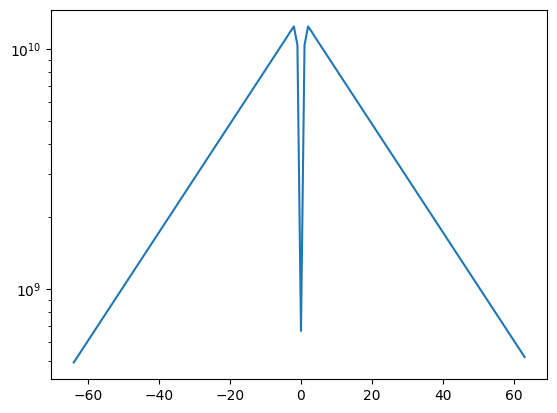

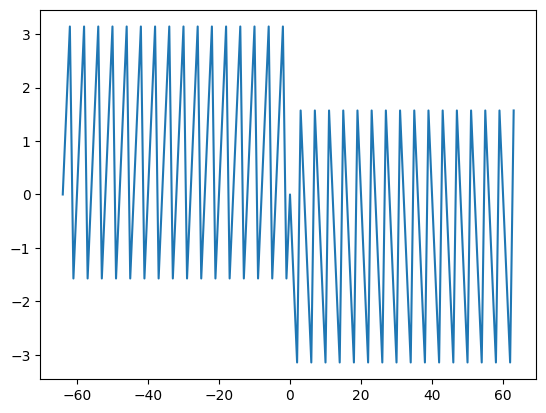

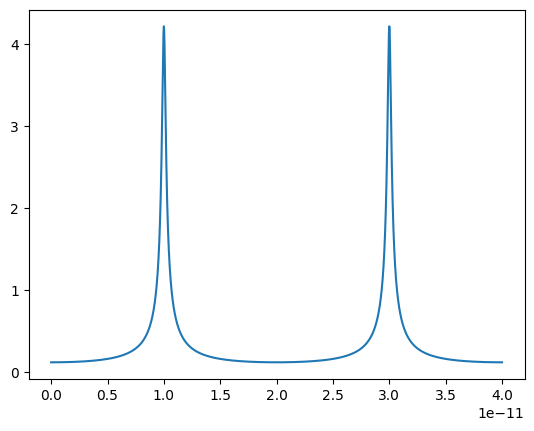

In [219]:
window = 2**6

plt.figure()
plt.plot(modes[mode_number//2-window:mode_number//2+window], E_intra_spectrum[mode_number//2-window:mode_number//2+window], label='E_intra_spectrum')
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(modes[mode_number//2-window:mode_number//2+window], E_intra_phase[mode_number//2-window:mode_number//2+window], label='E_intra_phase')
plt.show()

plt.figure()
plt.plot(xs, np.abs(E_intra), label='E_intra')
plt.show()

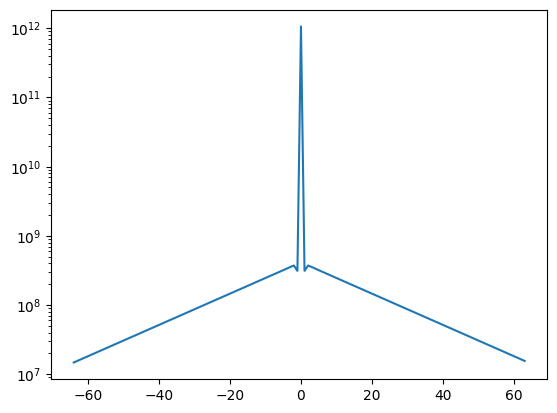

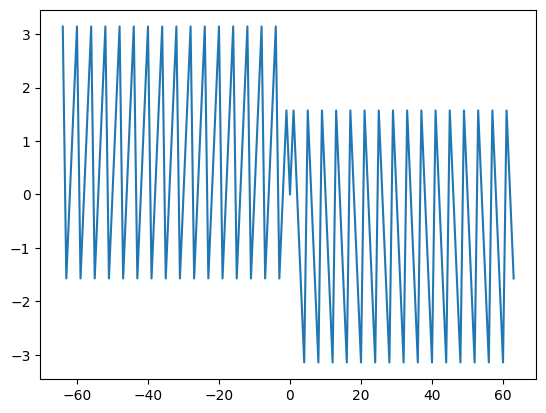

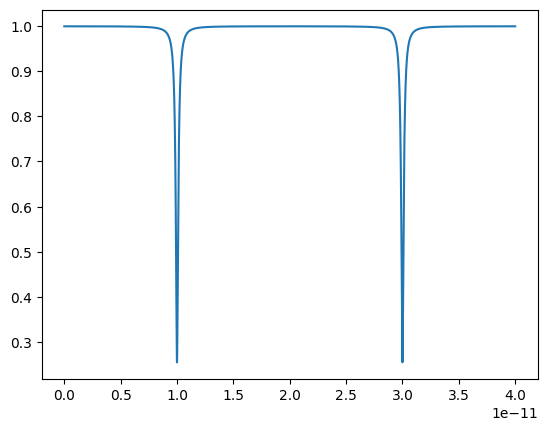

In [220]:
window = 2**6

plt.figure()
plt.plot(modes[mode_number//2-window:mode_number//2+window], E_out_spectrum[mode_number//2-window:mode_number//2+window], label='E_out_spectrum')
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(modes[mode_number//2-window:mode_number//2+window], E_out_phase[mode_number//2-window:mode_number//2+window], label='E_out_phase')
plt.show()

plt.figure()
plt.plot(xs, np.abs(E_out), label='E_out')
plt.show()